## ROI Analysis - Marketing

### 1. Background

- What is the impact of each marketing strategy and sales (Amount Collected)?
- Is the same strategy valid for across different facilities ?


### 2. Data Loading and Quality Checks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
data=pd.read_csv('Campaign-Data.csv')
data.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [3]:
data.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


### 3. Feature Additions and Engineering

In [4]:
## Creation of Additional Features 
data['Calendardate']=pd.to_datetime(data['Calendardate'], dayfirst=True)
data['Calendar_Month']=data['Calendardate'].dt.month
data['Calendar_Year']=data['Calendardate'].dt.year
data.describe()

,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
count,2976.000000,2976.000000,2976.0,2976,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2976.000000,2976.000000
mean,1456.935484,75.080645,1003.0,2014-12-31 18:00:00,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04,6.500000,2014.500000
min,0.000000,5.000000,1003.0,2014-01-16 00:00:00,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2014.000000
25%,240.000000,10.000000,1003.0,2014-07-09 06:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.750000,2014.000000
50%,960.000000,47.500000,1003.0,2015-01-01 00:00:00,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00,6.500000,2014.500000
75%,2090.000000,101.250000,1003.0,2015-06-23 18:00:00,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00,9.250000,2015.000000
max,9840.000000,510.000000,1003.0,2015-12-17 00:00:00,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06,12.000000,2015.000000
std,1669.848734,87.042114,0.0,NaN,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04,3.452633,0.500084


### 4. Statistical and Exploratory Data Analysis

1. Distribution of Data across different accounts
2. Difference of Sales in facility types 
3. Impact of Marketing Strategy on Sales (Using Correlation, and Regression)

In [5]:
data['Client Type'].value_counts(normalize=True)

Client Type
Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: proportion, dtype: float64

In [6]:
pd.crosstab(data['Number of Competition'],data['Client Type'],margins=True,normalize='columns')

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


In [7]:
data.groupby('Number of Competition').mean(numeric_only=True)

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Number of Competition,,,,,,,,,,,,,,,
High,1456.935484,75.080645,1003.0,2.974789e+07,213.127016,105398.938508,994046.717540,45198.036895,146945.564516,2.685333e+06,1.786754e+06,72172.379032,8452.620968,10.5,2015.0
Low,1456.935484,75.080645,1003.0,1.445570e+07,103.132258,150862.165766,623692.979839,26693.304194,128219.758065,1.890916e+06,1.883634e+06,70481.854839,15864.919355,5.7,2014.4


In [8]:
data.groupby('Client Type').mean(numeric_only=True)

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


In [9]:
data.corr(numeric_only=True)[['Amount Collected']]

,Amount Collected
Number of Customers,0.607496
Montly Target,0.608204
Zip Code,NaN
Amount Collected,1.000000
Unit Sold,0.997515
Campaign (Email),0.248235
Campaign (Flyer),0.444337
Campaign (Phone),0.034858
Sales Contact 1,0.277478
Sales Contact 2,0.552112


### Correlation Analysis

<Axes: >

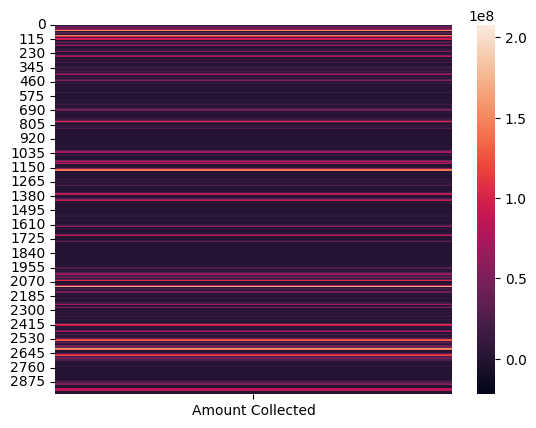

In [10]:
sns.heatmap(data[['Amount Collected']])

In [11]:
## Consolidated Strategy for Targeting
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(data[['Amount Collected',
'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Marketing_Strategy','Sales_Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Marketing_Strategy']!='Amount Collected']
correlation_analysis=correlation_analysis.sort_values('Sales_Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).format(precision=2)

,Marketing_Strategy,Sales_Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


#### Market Strategy Impact on Sales - Facility Type

In [12]:
cm = sns.light_palette("green", as_cmap=True)

correlation_analysis=pd.DataFrame(data.groupby('Client Type')[['Amount Collected',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Facility Type','Marketing_Strategy','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Marketing_Strategy']!='Amount Collected'].reset_index(drop=True)

#Pivot Table to represent the data in a consolidated format showing the relative impact of marketing strategy on sales

correlation_table = pd.pivot_table(correlation_analysis,index='Facility Type',columns='Marketing_Strategy')
correlation_table.style.background_gradient(cmap=cm).format(precision=2)

#### Regression Analysis (Marketing Strategies and Sales)

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:23:20   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [14]:
import io #summary table information converted as a dataframe 
df = pd.read_html(io.StringIO(results.summary().tables[1].as_html()),header=0,index_col=0)[0]
df

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.481000e+06,512000.000,2.891,0.004,477000.000,2490000.000
Campaign_Email,7.932000e-01,0.597,1.329,0.184,-0.377,1.963
Campaign_Flyer,3.337600e+00,0.260,12.831,0.000,2.828,3.848
Campaign_Phone,7.340000e-02,1.053,0.070,0.944,-1.991,2.137
Sales_Contact_1,4.236800e+00,0.415,10.207,0.000,3.423,5.051
Sales_Contact_2,3.638200e+00,0.129,28.155,0.000,3.385,3.892
Sales_Contact_3,2.343200e+00,0.131,17.925,0.000,2.087,2.600
Sales_Contact_4,1.094780e+01,1.060,10.331,0.000,8.870,13.026
Sales_Contact_5,3.507800e+00,4.549,0.771,0.441,-5.412,12.428


In [15]:
# Now the dataframe values are sorted based on the P value (P < 0.05 : 95% confidence interval)

df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,1.481000e+06
2,Campaign_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


#### Regression Analysis (Market Sales and Strategies) - Broken for different facility types

In [18]:
# OLS - Ordinary Least Squares Regression analaysis 

consolidated_summary=pd.DataFrame()

for type in list(set(list(data['Client_Type']))):
    temp_data=data[data['Client_Type']==type].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(io.StringIO(results.summary().tables[1].as_html()),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Facility Type']=type
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    #print(acctype)
    #consolidated_summary=consolidated_summary.append(df)
    consolidated_summary = pd.concat([df, pd.DataFrame(consolidated_summary)], ignore_index=True)
    print(df)
    #print(results.summary())
    

          Variable  Coefficent (Impact)    Facility Type
2   Campaign_Flyer               4.1059  Medium Facility
5  Sales_Contact_2               3.5778  Medium Facility
4  Sales_Contact_1               3.1365  Medium Facility
6  Sales_Contact_3               2.1174  Medium Facility
          Variable  Coefficent (Impact)    Facility Type
4  Sales_Contact_1              11.6731  Large Facility 
7  Sales_Contact_4              10.6145  Large Facility 
5  Sales_Contact_2               4.0031  Large Facility 
2   Campaign_Flyer               2.7204  Large Facility 
6  Sales_Contact_3               2.0316  Large Facility 
3   Campaign_Phone              -3.5361  Large Facility 
          Variable  Coefficent (Impact)    Facility Type
5  Sales_Contact_2             0.810100  Small Facility 
3   Campaign_Phone             0.000008  Small Facility 
          Variable  Coefficent (Impact)     Facility Type
5  Sales_Contact_2               6.6223  Private Facility


In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
consolidated_summary=pd.DataFrame()
for type in list(set(list(data['Client_Type']))):
    print(type)
    temp_data=data[data['Client_Type']==type].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=type
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    consolidated_summary = pd.concat([df, pd.DataFrame(consolidated_summary)], ignore_index=False)
#consolidated_summary=consolidated_summary.append(df)
    print(results.summary())

Medium Facility
                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.00
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           4.13e-57
Time:                        20:25:03   Log-Likelihood:                -9461.9
No. Observations:                 504   AIC:                         1.894e+04
Df Residuals:                     495   BIC:                         1.898e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.682e+06

/var/folders/54/kt6v8mbj5c58llfp5bsxw7xc0000gn/T/ipykernel_21031/60617344.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
/var/folders/54/kt6v8mbj5c58llfp5bsxw7xc0000gn/T/ipykernel_21031/60617344.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
/var/folders/54/kt6v8mbj5c58llfp5bsxw7xc0000gn/T/ipykernel_21031/60617344.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),h

### 5. Summary

In [23]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
5,Sales_Contact_2,6.622300,Private Facility
5,Sales_Contact_2,0.810100,Small Facility
3,Campaign_Phone,0.000008,Small Facility
4,Sales_Contact_1,11.673100,Large Facility
7,Sales_Contact_4,10.614500,Large Facility
5,Sales_Contact_2,4.003100,Large Facility
2,Campaign_Flyer,2.720400,Large Facility
6,Sales_Contact_3,2.031600,Large Facility
3,Campaign_Phone,-3.536100,Large Facility
2,Campaign_Flyer,4.105900,Medium Facility


In [24]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',inplace=True,axis=1)

In [26]:
my_color = (50/255, 50/255, 150/255, 0.6)
cm = sns.light_palette (my_color, as_cmap=True)
consolidated_summary.columns = ['Marketing_Strategy','Return on Investment','Facility Type']

summary_table = pd.pivot_table(consolidated_summary,index='Facility Type',columns='Marketing_Strategy')
summary_table.style.background_gradient(cmap=cm).format(precision=2)
summary_table.style.background_gradient(cmap=cm)

In [27]:
summary_table.to_csv('consolidated_summary.csv')
open('consolidated_summary.csv')

<_io.TextIOWrapper name='consolidated_summary.csv' mode='r' encoding='UTF-8'>

#### Key Findings

- Overall **Phone campaign has negligible or negative impact on Sales**

- Large Facility **ROI > 10x for Sales contact 1 and 4** 
- Medium Facility **ROI > 4x for campaign flyer** followed by Sales contact 1 and 2
- Small Facility **ROI < 1x for sales contact 2**
- Private Facility **Sales contact 2 has 6.6x ROI**

